# Regression with location and room no: as dummy variables

The standard approach, thanks to the feedback from Haritha, to do in case of room numers is that to change them into dummy variables. This makes sense due o the categorical nature of these variables. I also did this for the locations and in this notebook selected a subset of the data which has top 20 locations (based on the number of rental properties availabale).

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('plot_style_mk.mplstyle')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = ['navy','brown','royalblue'])

In [26]:
file = './Data/housing_data_hamburg_v4.txt'
df_housing = pd.read_csv(file, sep = '\t', encoding= 'unicode_escape')
df_housing

,Area,Rooms,Location,Rent
0,84,3,Barmbek-Nord,1.150
1,68.17,3,Bergedorf,"382,43"
2,83.3,3.5,Lohbrügge,"574,77"
3,72.5,3,Lohbrügge,"500,25"
4,60,2.5,Lohbrügge,414
...,...,...,...,...
828,47,2,Eißendorf,"538,21"
829,49.27,2,Winterhude,610
830,42.92,2,Neuenfelde,560
831,50,2,Alsterdorf,"585,75"


In [27]:
#removing area formats which does not satisfy the requirements
outlier_area = []
for area in df_housing['Area']:
    if '-' in str(area):
        print(area)
        outlier_area.append(area)
df_clean = df_housing[df_housing.Area.isin(outlier_area) == False]

53 - 115
37.41 - 100.85
40 - 136
60 - 130
40.4 - 120.4


In [28]:
#Checking if there are any rows with missing information
df_clean.isnull().values.any()

True

In [29]:
#removing the rows with null values
df_clean = df_clean.dropna()
df_clean.head()

,Area,Rooms,Location,Rent
0,84,3,Barmbek-Nord,1.150
1,68.17,3,Bergedorf,"382,43"
2,83.3,3.5,Lohbrügge,"574,77"
3,72.5,3,Lohbrügge,"500,25"
4,60,2.5,Lohbrügge,414


In [30]:
#removing outlier rooms
print(df_clean['Rooms'].value_counts())
df_clean = df_clean[df_clean.Rooms.isin(['10', '7']) == False]

2      311
3      222
1      126
4       51
2.5     46
1.5     21
5       13
3.5     12
4.5      6
6        3
5.5      1
10       1
7        1
Name: Rooms, dtype: int64


In [31]:
print(df_clean['Location'].value_counts())

Rahlstedt               43
Winterhude              35
Barmbek-Nord            27
Stellingen              26
Bergedorf               26
                        ..
Rothenburgsort           1
Lemsahl-Mellingstedt     1
Rönneburg                1
Moorburg                 1
Ochsenwerder             1
Name: Location, Length: 86, dtype: int64


In [32]:
# selecting top 20 locations
locations_top = df_clean['Location'].value_counts().index.tolist()[:20]
print(locations_top)

df_clean = df_clean.loc[df_clean['Location'].isin(locations_top)]
df_clean

['Rahlstedt', 'Winterhude', 'Barmbek-Nord', 'Stellingen', 'Bergedorf', 'Eimsbüttel', 'Uhlenhorst', 'St. Georg', 'Barmbek-Süd', 'Hohenfelde', 'HafenCity', 'Harburg', 'Bahrenfeld', 'Niendorf', 'Othmarschen', 'Bramfeld', 'Wandsbek', 'Altona-Nord', 'Jenfeld', 'Alsterdorf']


,Area,Rooms,Location,Rent
0,84,3,Barmbek-Nord,1.150
1,68.17,3,Bergedorf,"382,43"
5,64.17,2.5,Harburg,"483,84"
6,49.63,2,Barmbek-Süd,715
7,60.25,2.5,Bramfeld,"468,75"
...,...,...,...,...
819,28,2,Alsterdorf,540
823,51.16,2,Eimsbüttel,555
825,104.3,4,Stellingen,1.515
829,49.27,2,Winterhude,610


In [33]:
#changing the numeric type of the area
df_clean['Area'] = pd.to_numeric(df_clean['Area'])
df_clean.head()

,Area,Rooms,Location,Rent
0,84.00,3,Barmbek-Nord,1.150
1,68.17,3,Bergedorf,"382,43"
5,64.17,2.5,Harburg,"483,84"
6,49.63,2,Barmbek-Süd,715
7,60.25,2.5,Bramfeld,"468,75"


In [34]:
#changing the rent format and changing it into numerical values
df_clean['Rent'] =  df_clean['Rent'].str.replace('.', '', regex=False)
df_clean['Rent'] = pd.to_numeric(df_clean['Rent'].str.replace(',', '.', regex=False))
df_clean = df_clean[df_clean.Rent.isin([max(df_clean['Rent'])]) == False]
df_clean.head()

,Area,Rooms,Location,Rent
0,84.00,3,Barmbek-Nord,1150.00
1,68.17,3,Bergedorf,382.43
5,64.17,2.5,Harburg,483.84
6,49.63,2,Barmbek-Süd,715.00
7,60.25,2.5,Bramfeld,468.75


In [35]:
print(f'With duplicates = {df_clean.shape}')
print(df_clean.duplicated().any())
df_clean = df_clean.drop_duplicates()
print(f'With out duplicates = {df_clean.shape}')

With duplicates = (427, 4)
True
With out duplicates = (422, 4)


In [36]:
#creating dummy variables for rooms and locations
df_new = pd.get_dummies(df_clean, columns = ['Rooms'], drop_first=True)
df_new = pd.get_dummies(df_new, columns = ['Location'], drop_first=True)
df_new.head()

,Area,Rent,Rooms_1.5,Rooms_2,Rooms_2.5,Rooms_3,Rooms_3.5,Rooms_4,Rooms_4.5,Rooms_5,...,Location_Hohenfelde,Location_Jenfeld,Location_Niendorf,Location_Othmarschen,Location_Rahlstedt,Location_St. Georg,Location_Stellingen,Location_Uhlenhorst,Location_Wandsbek,Location_Winterhude
0,84.00,1150.00,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,68.17,382.43,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,64.17,483.84,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,49.63,715.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,60.25,468.75,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# saving the dataframe
df_new.to_csv('HH_rent_clean_wt_dummy.csv', index = False)

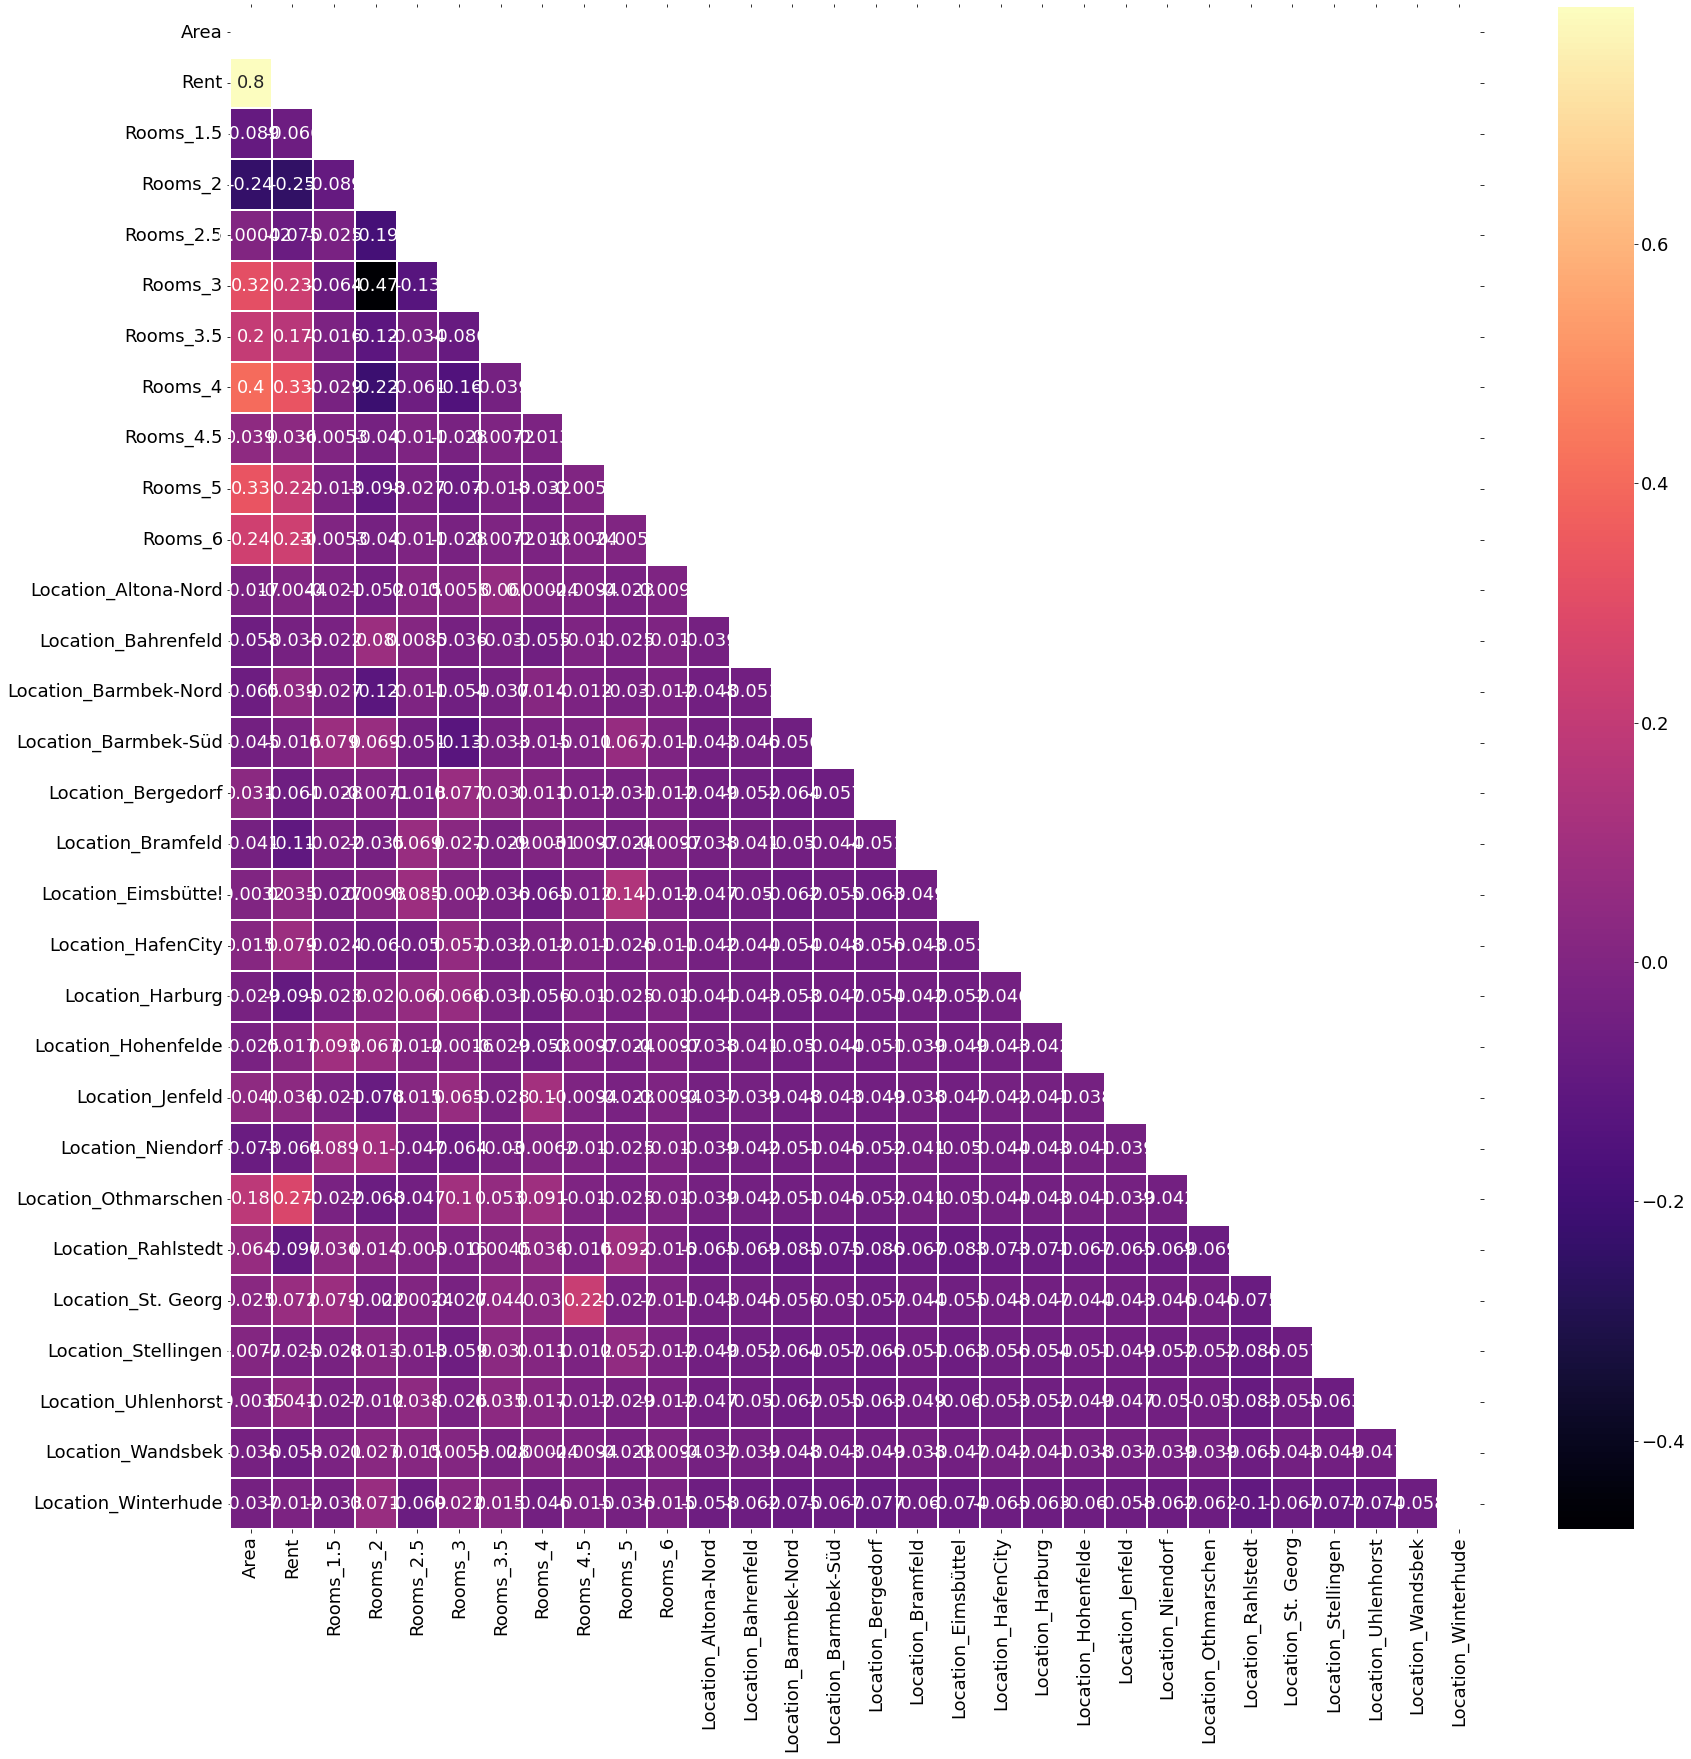

In [38]:
#check the correlation again using new dataframe correlation plot
import seaborn as sns

plt.figure(figsize=(28, 28))
matrix = np.triu(df_new.corr())
sns.heatmap(df_new.corr(), annot=True,
            linewidth=.2, mask=matrix, cmap="magma")
plt.show();

## Regression part

In [39]:
train_dataset = df_new.sample(frac=0.8, random_state=0)
test_dataset = df_new.drop(train_dataset.index)

In [40]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Rent')
test_labels = test_features.pop('Rent')

In [41]:
print(train_dataset.shape)
print(train_labels.shape)

(338, 30)
(338,)


In [42]:
print(test_dataset.shape)
print(test_labels.shape)

(84, 30)
(84,)


In [43]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [44]:
scalar = StandardScaler()
X_train = scalar.fit_transform(train_features)

In [45]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_train, train_labels)
train_pred = sgdr.predict(X_train)

print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, Number of weight updates: {sgdr.t_}")
print(f'Score = {sgdr.score(X_train, train_labels)}')
print(f'RMSE = {mean_squared_error(train_labels, train_pred ,squared = False)}')

SGDRegressor(max_iter=10000)
Number of iterations completed: 114, Number of weight updates: 38533.0
Score = 0.7409313819517144
RMSE = 306.6961162553767


In [46]:
X_test = scalar.fit_transform(test_features)
test_pred = sgdr.predict(X_test)
print(f'RMSE = {mean_squared_error(test_labels, test_pred ,squared = False)}')
print(f'Score = {sgdr.score(X_test, test_labels)}')

RMSE = 429.32267013895364
Score = 0.6503804964058819


Text(0, 0.5, 'Rent-predi($in\\;eur$)')

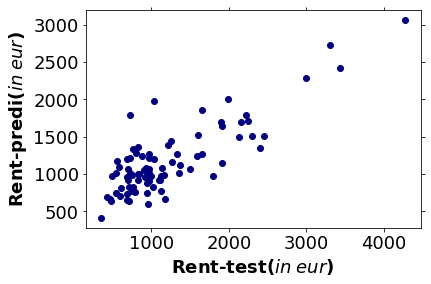

In [47]:
fig4, ax4 = plt.subplots()
ax4.scatter(test_labels, test_pred)
ax4.set_xlabel('Rent-test($in\;eur$)')
ax4.set_ylabel('Rent-predi($in\;eur$)')
#plt.savefig('model_performance.png', bbox_inches = 'tight')